In [7]:
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 -q --user

**Importing libraries**

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df= pd.read_csv('/content/ottdata.csv')

In [11]:
df.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46


In [12]:
df.tail()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
995,1.58,1311.96,0,Romance,Friday,Fall,48.58,0.36
996,1.34,1329.48,0,Action,Friday,Summer,72.42,0.56
997,1.62,1359.80,1,Sci-Fi,Wednesday,Fall,150.44,0.66
998,2.06,1698.35,0,Romance,Monday,Summer,48.72,0.47
999,1.36,1140.23,0,Comedy,Saturday,Summer,52.94,0.49


Data Dictionary:
visitors: Average number of visitors, in millions, to the platform in the past week


ad_impressions: Number of ad impressions, in millions, across all ad campaigns for the content (running and completed)


major_sports_event: Any major sports event on the day


genre: Genre of the content


dayofweek: Day of the release of the content


season: Season of the release of the content


views_trailer: Number of views, in millions, of the content trailer


views_content: Number of first-day views, in millions, of the content

In [13]:
df.shape


(1000, 8)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   int64  
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [15]:
df.describe()

,visitors,ad_impressions,major_sports_event,views_trailer,views_content
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,1.704290,1434.712290,0.400000,66.91559,0.473400
std,0.231973,289.534834,0.490143,35.00108,0.105914
min,1.250000,1010.870000,0.000000,30.08000,0.220000
25%,1.550000,1210.330000,0.000000,50.94750,0.400000
50%,1.700000,1383.580000,0.000000,53.96000,0.450000
75%,1.830000,1623.670000,1.000000,57.75500,0.520000
max,2.340000,2424.200000,1.000000,199.92000,0.890000


# **Duplicate value check and missing null treatment**

In [16]:
df.isnull().sum()

,0
visitors,0
ad_impressions,0
major_sports_event,0
genre,0
dayofweek,0
season,0
views_trailer,0
views_content,0


In [17]:
duplicate_rows = df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

print(df[duplicate_rows])

Number of duplicate rows: 0
Empty DataFrame
Columns: [visitors, ad_impressions, major_sports_event, genre, dayofweek, season, views_trailer, views_content]
Index: []


# **Univariate analysis**

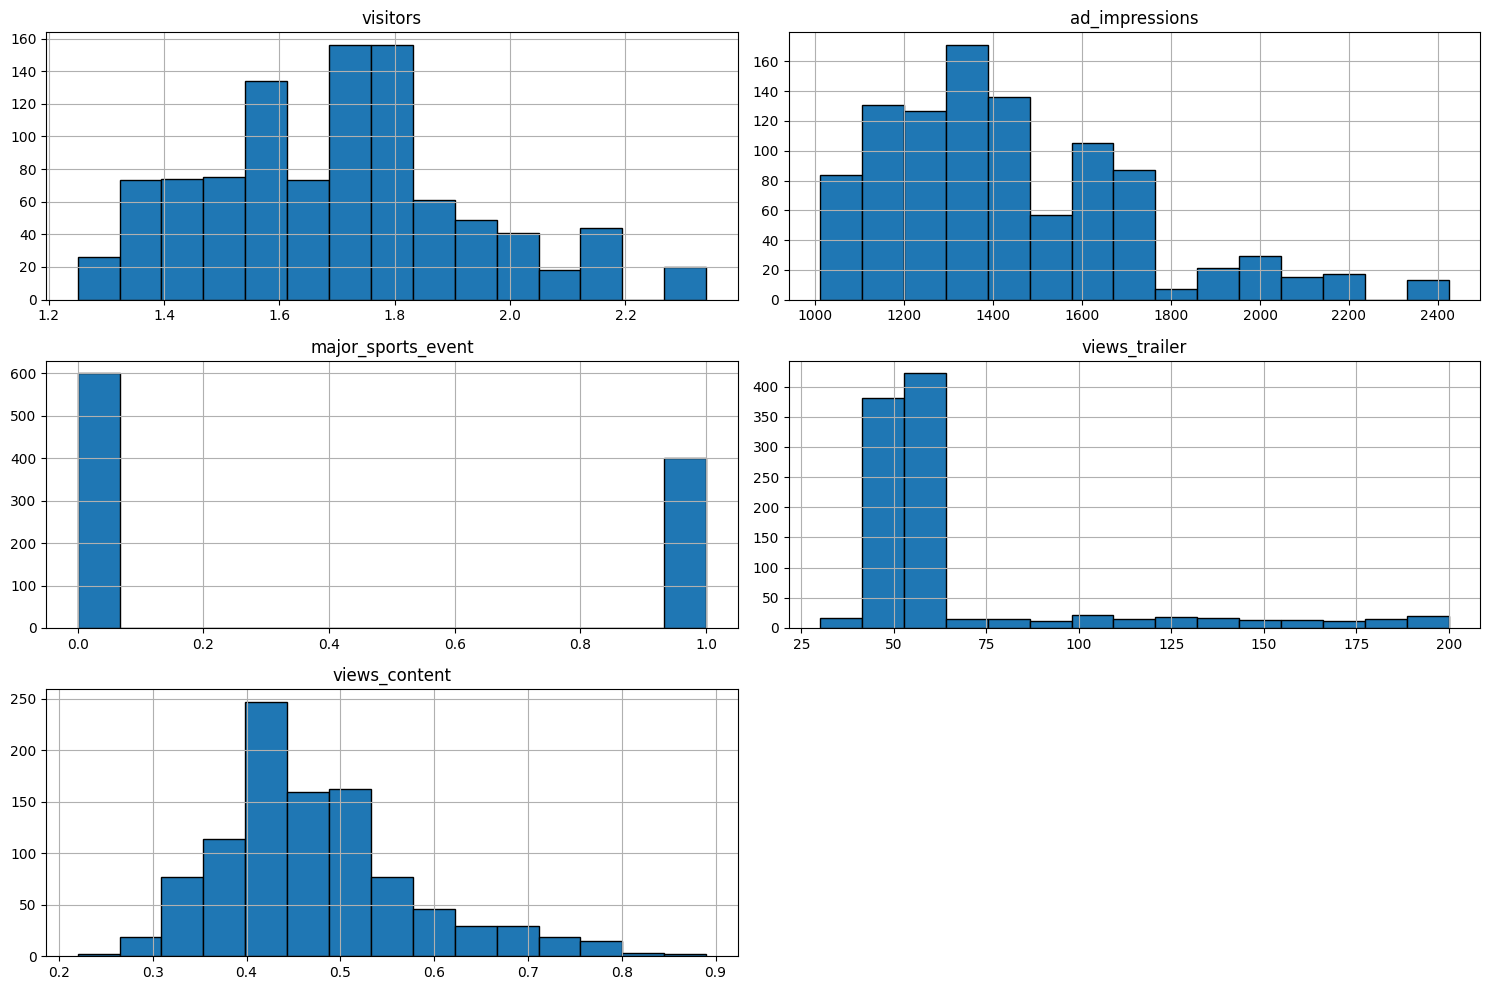

In [18]:
df.hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.show()

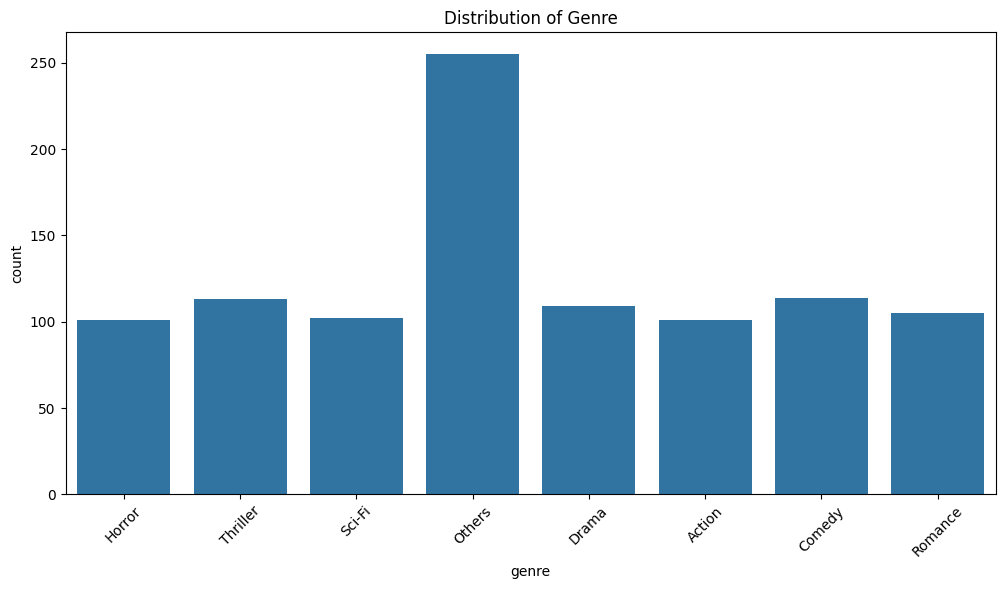

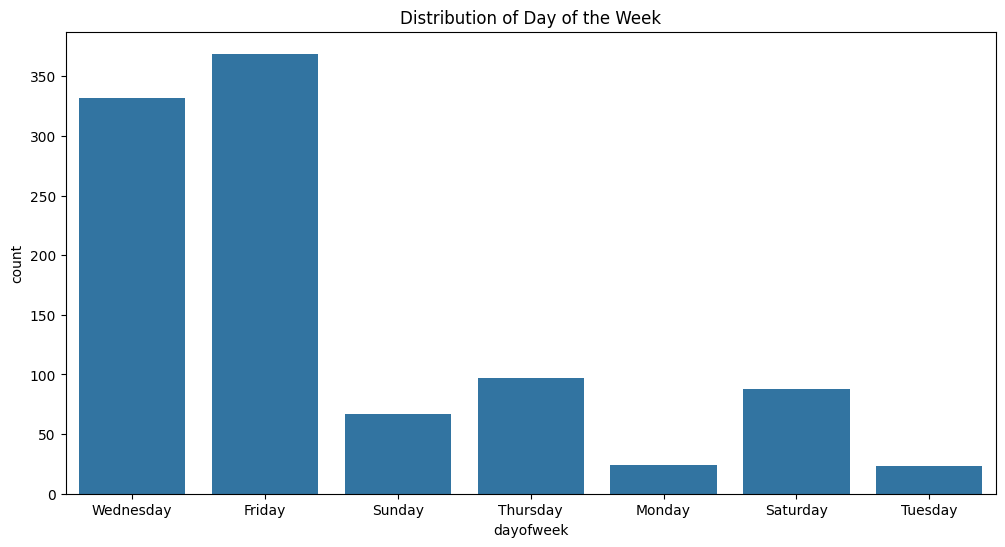

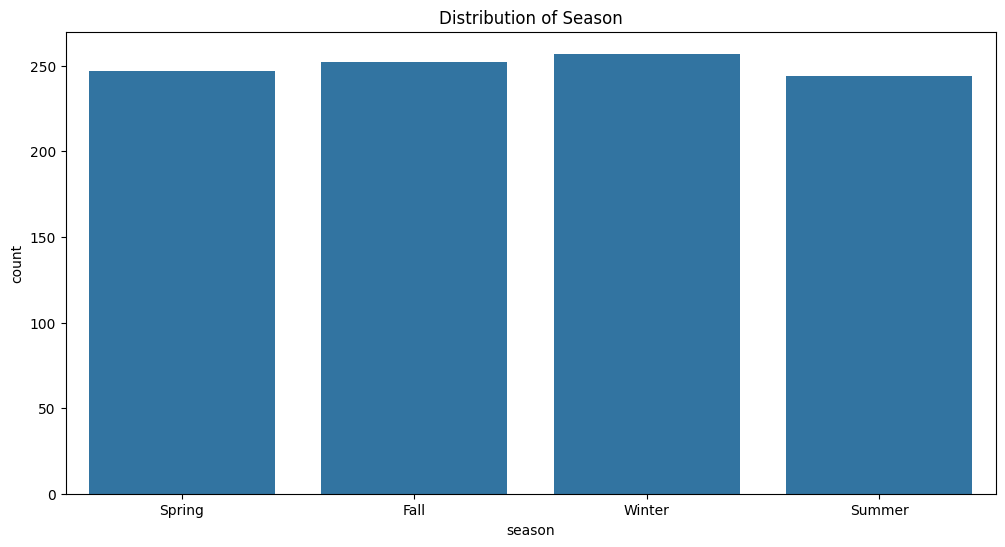

In [19]:

plt.figure(figsize=(12, 6))
sns.countplot(x='genre', data=df)
plt.xticks(rotation=45)
plt.title('Distribution of Genre')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='dayofweek', data=df)
plt.title('Distribution of Day of the Week')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='season', data=df)
plt.title('Distribution of Season')
plt.show()


count    1000.000000
mean        1.704290
std         0.231973
min         1.250000
25%         1.550000
50%         1.700000
75%         1.830000
max         2.340000
Name: visitors, dtype: float64


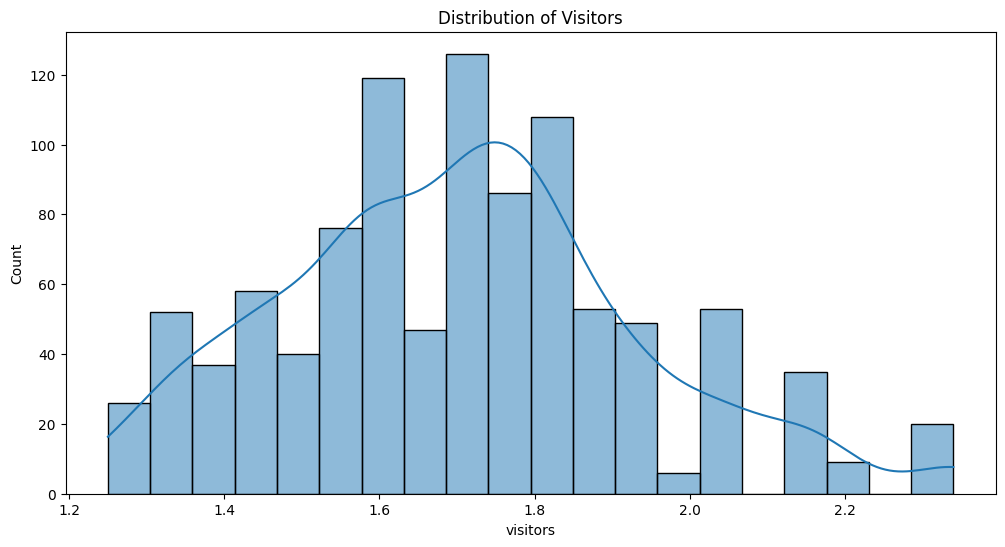

In [20]:
# Summary statistics for visitors
print(df['visitors'].describe())

# Histogram and Boxplot for visitors
plt.figure(figsize=(12, 6))
sns.histplot(df['visitors'], kde=True)
plt.title('Distribution of Visitors')
plt.show()




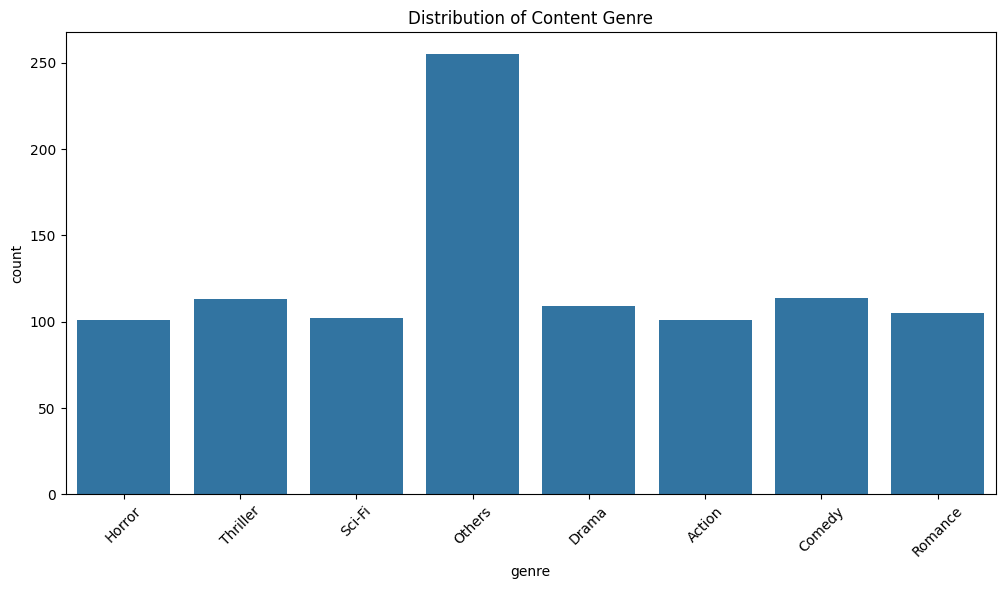

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(x='genre', data=df)
plt.title('Distribution of Content Genre')
plt.xticks(rotation=45)
plt.show()


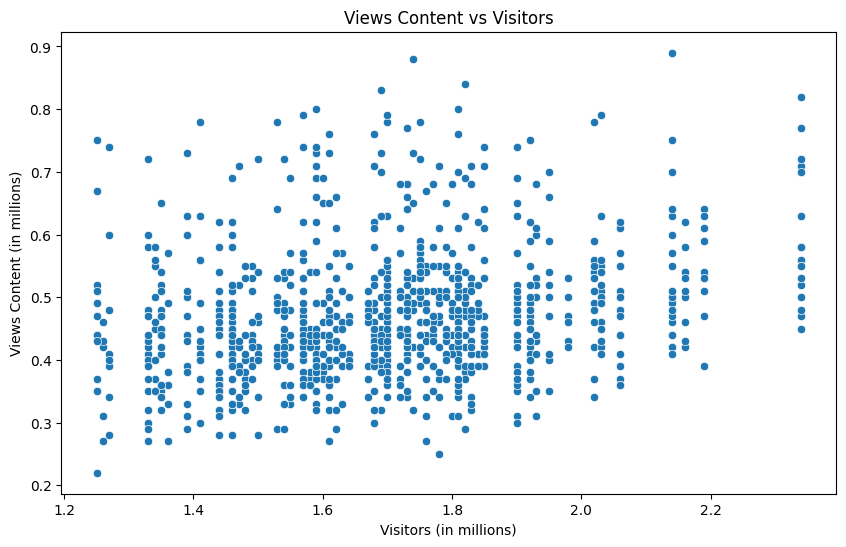

Correlation between Visitors and Views Content:
                visitors  views_content
visitors       1.000000       0.259136
views_content  0.259136       1.000000


In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='visitors', y='views_content', data=df)
plt.title('Views Content vs Visitors')
plt.xlabel('Visitors (in millions)')
plt.ylabel('Views Content (in millions)')
plt.show()

correlation_visitors = df[['visitors', 'views_content']].corr()
print("Correlation between Visitors and Views Content:\n", correlation_visitors)


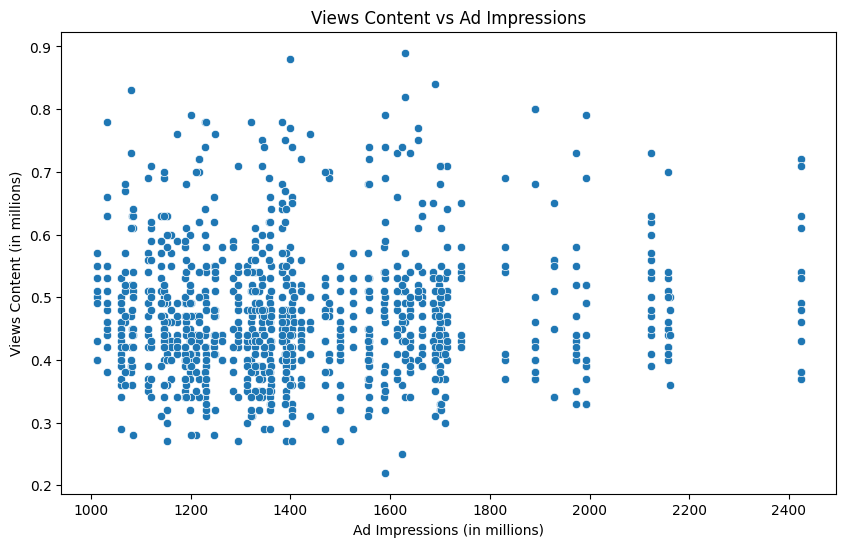

Correlation between Ad Impressions and Views Content:
                 ad_impressions  views_content
ad_impressions        1.000000       0.050022
views_content         0.050022       1.000000


In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ad_impressions', y='views_content', data=df)
plt.title('Views Content vs Ad Impressions')
plt.xlabel('Ad Impressions (in millions)')
plt.ylabel('Views Content (in millions)')
plt.show()

correlation_ad_impressions = df[['ad_impressions', 'views_content']].corr()
print("Correlation between Ad Impressions and Views Content:\n", correlation_ad_impressions)


# Bivariate **analysis**

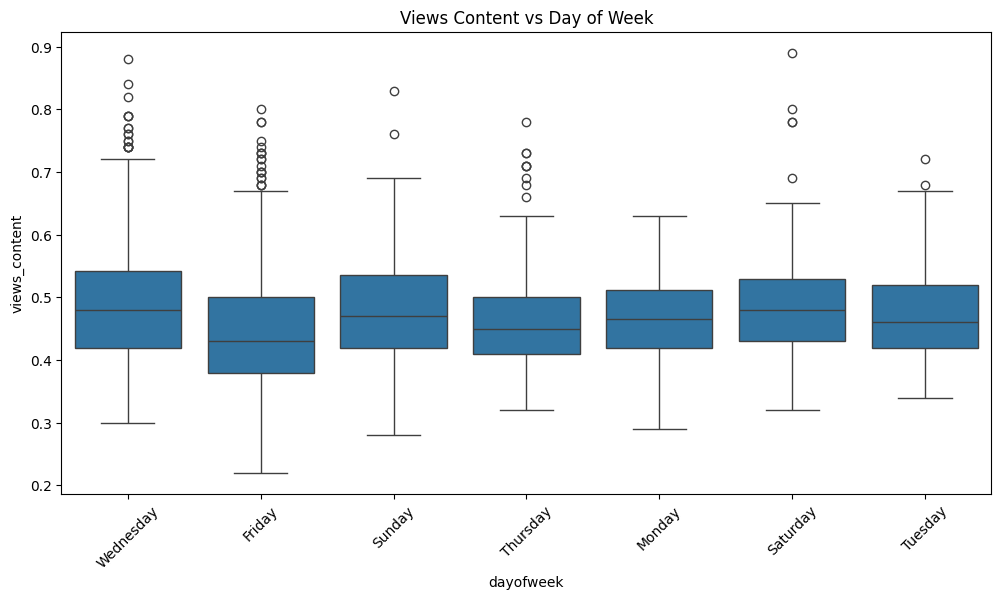

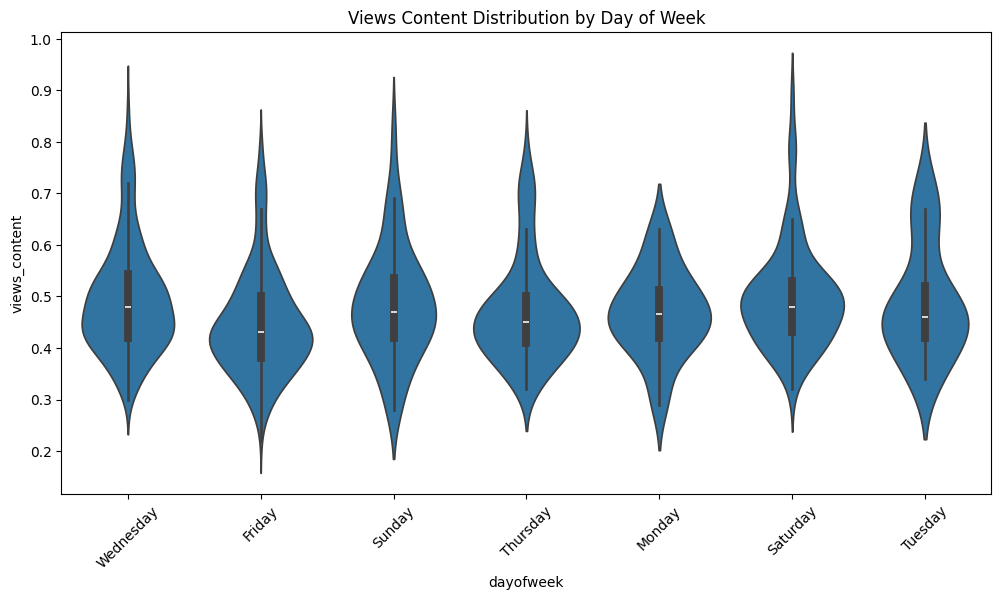

In [24]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='dayofweek', y='views_content', data=df)
plt.title('Views Content vs Day of Week')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(12, 6))
sns.violinplot(x='dayofweek', y='views_content', data=df)
plt.title('Views Content Distribution by Day of Week')
plt.xticks(rotation=45)
plt.show()


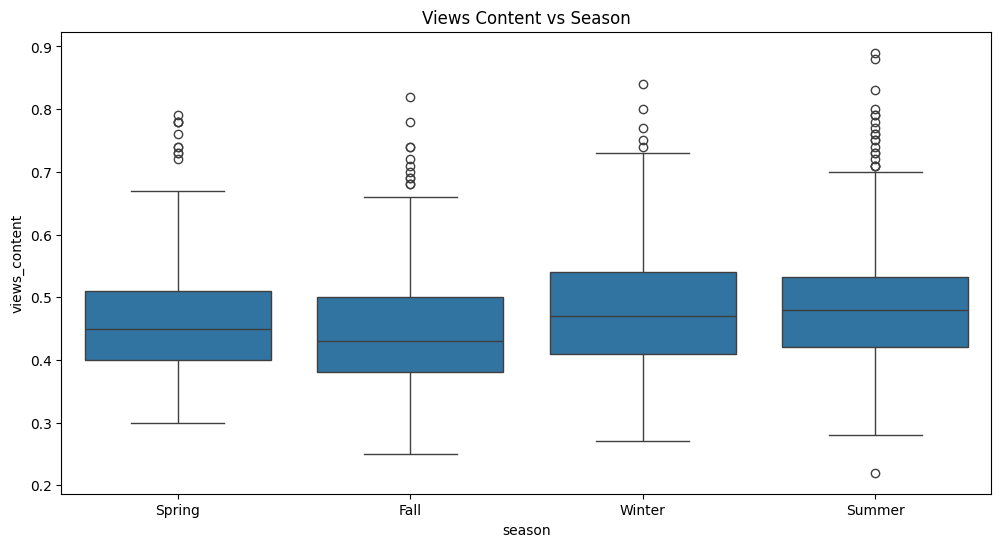

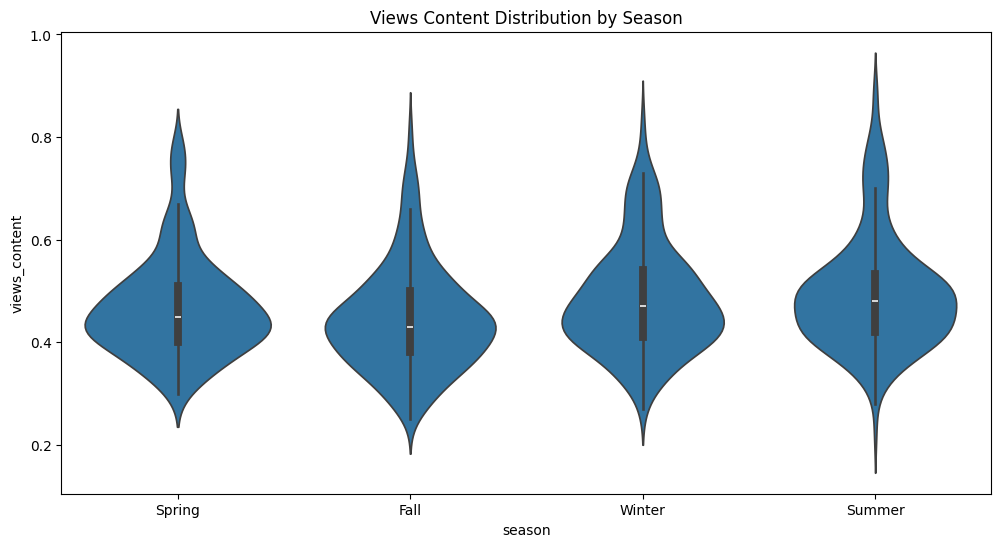

In [25]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='views_content', data=df)
plt.title('Views Content vs Season')
plt.show()


plt.figure(figsize=(12, 6))
sns.violinplot(x='season', y='views_content', data=df)
plt.title('Views Content Distribution by Season')
plt.show()


# **Answering key questions**

What does the distribution of content views look like?

What does the distribution of genres look like?

The day of the week on which content is released generally plays a key role in the viewership. How does the viewership vary with the day of release?

How does the viewership vary with the season of release?

What is the correlation between trailer views and content views?

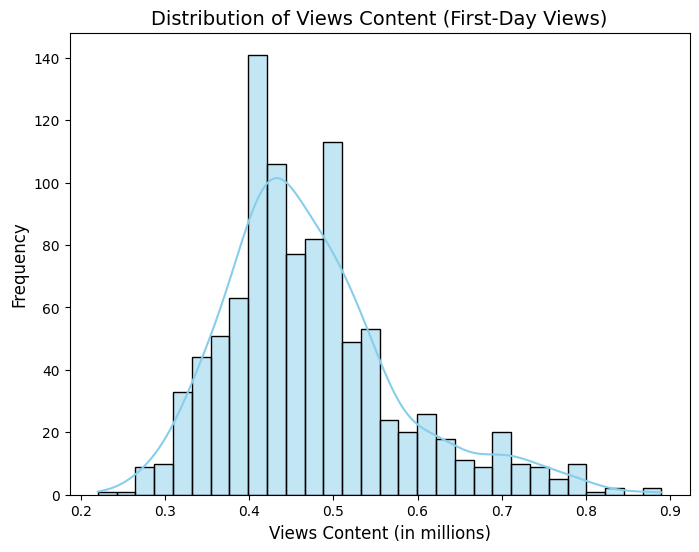

In [26]:
plt.figure(figsize=(8, 6))
sns.histplot(df['views_content'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Views Content (First-Day Views)', fontsize=14)
plt.xlabel('Views Content (in millions)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


<ipython-input-27-59b7b64d19ef>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='genre', data=df, palette='viridis');


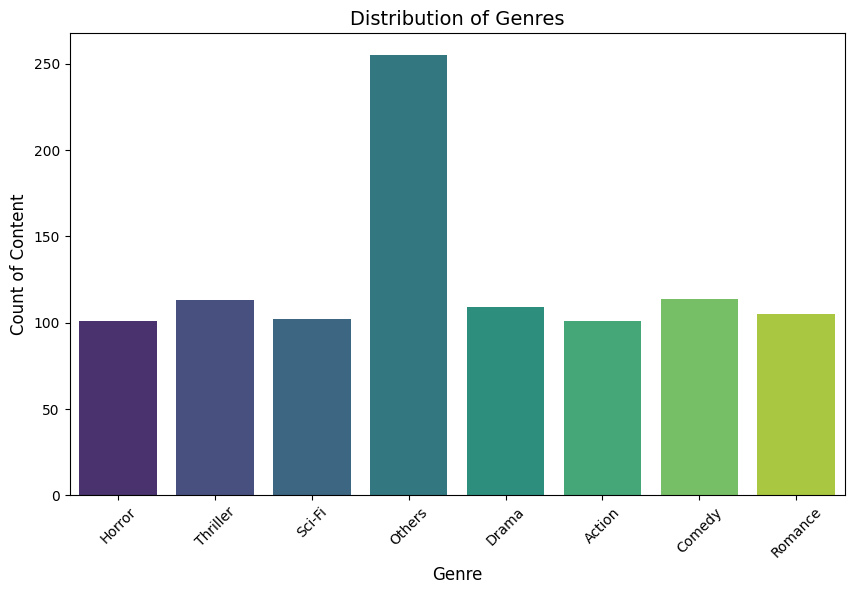

Genre Distribution (Counts):
genre
Others      255
Comedy      114
Thriller    113
Drama       109
Romance     105
Sci-Fi      102
Horror      101
Action      101
Name: count, dtype: int64


In [27]:
plt.figure(figsize=(10, 6));
sns.countplot(x='genre', data=df, palette='viridis');
plt.title('Distribution of Genres', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Count of Content', fontsize=12)
plt.xticks(rotation=45)
plt.show();

genre_counts = df['genre'].value_counts()
print("Genre Distribution (Counts):")
print(genre_counts)

<ipython-input-28-73114ef5d210>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dayofweek', y='views_content', data=df, palette='muted')


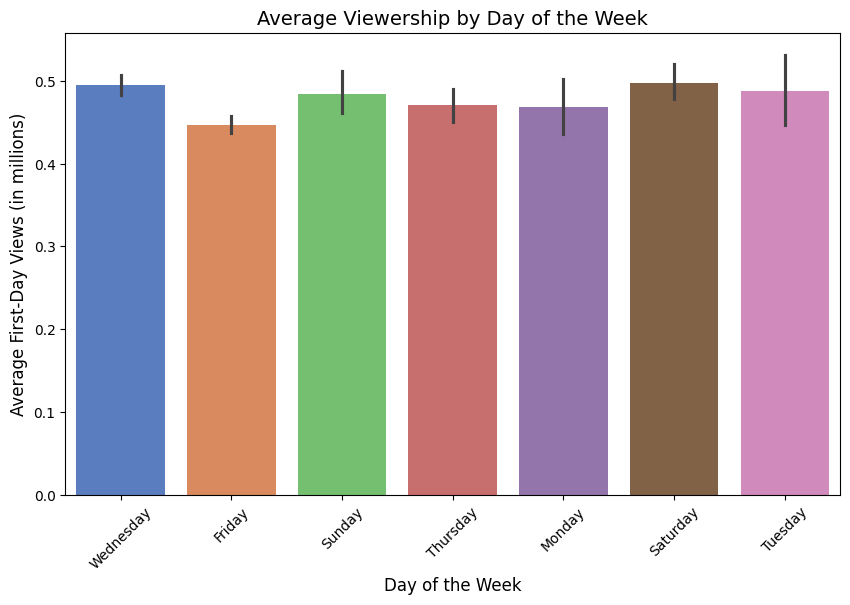

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x='dayofweek', y='views_content', data=df, palette='muted')
plt.title('Average Viewership by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average First-Day Views (in millions)', fontsize=12)
plt.xticks(rotation=45)  # Rotate day labels
plt.show()

<ipython-input-29-7c30f9079ee9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='views_content', data=df, palette='muted')


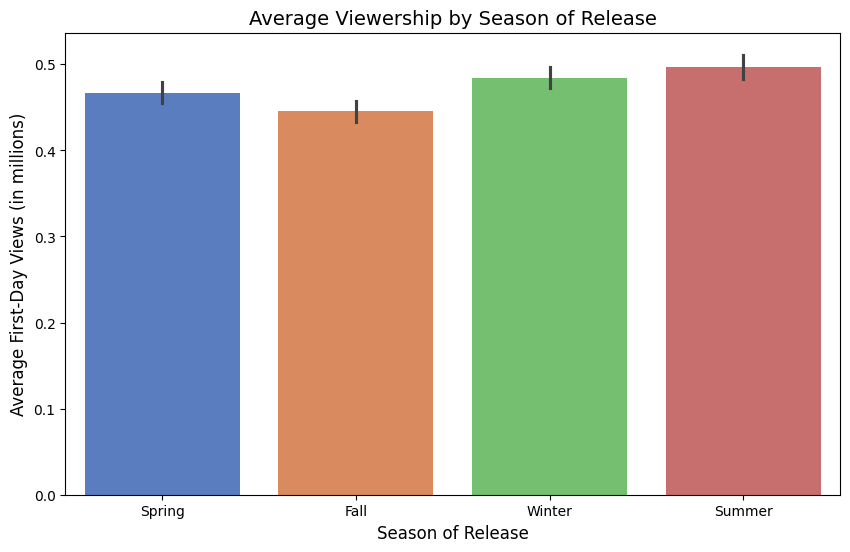

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='views_content', data=df, palette='muted')
plt.title('Average Viewership by Season of Release', fontsize=14)
plt.xlabel('Season of Release', fontsize=12)
plt.ylabel('Average First-Day Views (in millions)', fontsize=12)
plt.show()

Pearson Correlation between Trailer Views and Content Views: 0.753962214820536


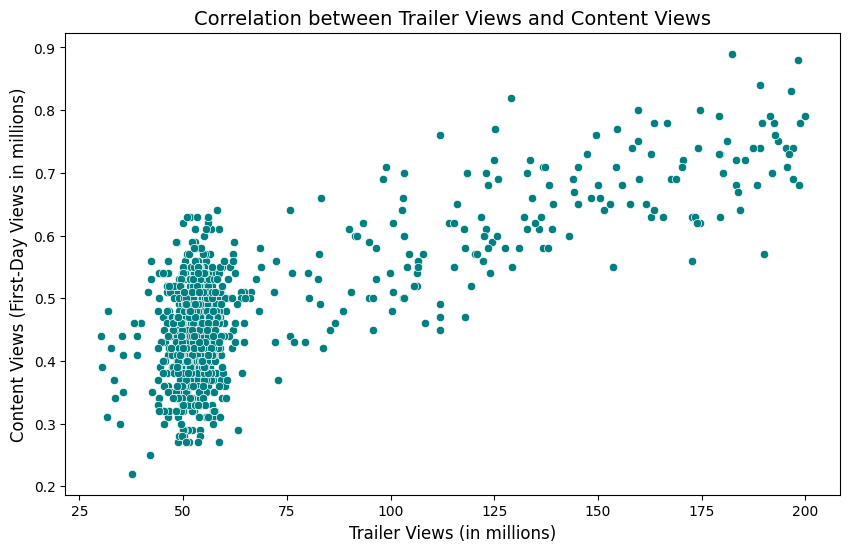

In [30]:
correlation = df['views_trailer'].corr(df['views_content'])
print(f"Pearson Correlation between Trailer Views and Content Views: {correlation}")

# 2. Scatter Plot to visualize the relationship between trailer views and content views
plt.figure(figsize=(10, 6))
sns.scatterplot(x='views_trailer', y='views_content', data=df, color='teal')
plt.title('Correlation between Trailer Views and Content Views', fontsize=14)
plt.xlabel('Trailer Views (in millions)', fontsize=12)
plt.ylabel('Content Views (First-Day Views in millions)', fontsize=12)
plt.show()

In [32]:
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64


In [33]:
df.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46


In [34]:
duplicate_rows = df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 0


In [35]:

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1


    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("Shape of dataset after outlier removal:", df.shape)


Shape of dataset after outlier removal: (786, 8)


In [37]:
print("Dataset shape after preprocessing:", df.shape)
print(df.head())


Dataset shape after preprocessing: (782, 8)
   visitors  ad_impressions  major_sports_event     genre  dayofweek  season  \
0      1.67         1113.81                   0    Horror  Wednesday  Spring   
1      1.46         1498.41                   1  Thriller     Friday    Fall   
2      1.47         1079.19                   1  Thriller  Wednesday    Fall   
3      1.85         1342.77                   1    Sci-Fi     Friday    Fall   
4      1.46         1498.41                   0    Sci-Fi     Sunday  Winter   

   views_trailer  views_content  
0          56.70           0.51  
1          52.69           0.32  
2          48.74           0.39  
3          49.81           0.44  
4          55.83           0.46  


## **FEATUR**E **ENGINEERING**


In [38]:
df['engagement_rate'] = df['views_trailer'] / (df['views_content'] + 1e-5)
df['marketing_effectiveness'] = df['ad_impressions'] / (df['views_content'] + 1e-5)

print("New features added:")
print(df[['engagement_rate', 'marketing_effectiveness']].head())


New features added:
   engagement_rate  marketing_effectiveness
0       111.174291              2183.898355
1       164.651105              4682.384925
2       124.971155              2767.082895
3       113.201973              3051.680644
4       121.366927              3257.342232


In [39]:
df = pd.get_dummies(df, columns=['genre', 'dayofweek', 'season'], drop_first=True)

print("Dataset after One-Hot Encoding:")
print(df.head())


Dataset after One-Hot Encoding:
   visitors  ad_impressions  major_sports_event  views_trailer  views_content  \
0      1.67         1113.81                   0          56.70           0.51   
1      1.46         1498.41                   1          52.69           0.32   
2      1.47         1079.19                   1          48.74           0.39   
3      1.85         1342.77                   1          49.81           0.44   
4      1.46         1498.41                   0          55.83           0.46   

   engagement_rate  marketing_effectiveness  genre_Comedy  genre_Drama  \
0       111.174291              2183.898355         False        False   
1       164.651105              4682.384925         False        False   
2       124.971155              2767.082895         False        False   
3       113.201973              3051.680644         False        False   
4       121.366927              3257.342232         False        False   

   genre_Horror  ...  genre_Thriller

In [42]:
from sklearn.preprocessing import StandardScaler
numeric_cols = ['visitors', 'ad_impressions', 'views_trailer', 'engagement_rate', 'marketing_effectiveness']

# Scale numeric features
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("Dataset after scaling:")
print(df.head())

Dataset after scaling:
   visitors  ad_impressions  major_sports_event  views_trailer  views_content  \
0 -0.111872       -1.141596                   0       0.970533           0.51   
1 -1.091169        0.301513                   1      -0.088043           0.32   
2 -1.044536       -1.271498                   1      -1.130780           0.39   
3  0.727525       -0.282484                   1      -0.848317           0.44   
4 -1.091169        0.301513                   0       0.740867           0.46   

   engagement_rate  marketing_effectiveness  genre_Comedy  genre_Drama  \
0        -0.599650                -1.390450         False        False   
1         1.926601                 1.678202         False        False   
2         0.052115                -0.674180         False        False   
3        -0.503862                -0.324636         False        False   
4        -0.118149                -0.072042         False        False   

   genre_Horror  ...  genre_Thriller  dayofwe

### DATA **PREPARATION**

In [43]:

X = df.drop(columns=['views_content'])
y = df['views_content']

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (782, 22)
Target shape: (782,)


In [44]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (625, 22)
Testing set shape: (157, 22)


In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

selector = RandomForestRegressor(random_state=42)
selector.fit(X_train, y_train)

feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': selector.feature_importances_})
print(feature_importance.sort_values(by='Importance', ascending=False))


X_train_selected = X_train[feature_importance['Feature'][:10]]
X_test_selected = X_test[feature_importance['Feature'][:10]]


                    Feature  Importance
4           engagement_rate    0.839656
3             views_trailer    0.144115
5   marketing_effectiveness    0.006970
0                  visitors    0.002824
1            ad_impressions    0.001686
18      dayofweek_Wednesday    0.000723
6              genre_Comedy    0.000570
9              genre_Others    0.000429
2        major_sports_event    0.000417
20            season_Summer    0.000320
19            season_Spring    0.000319
7               genre_Drama    0.000311
11             genre_Sci-Fi    0.000287
14       dayofweek_Saturday    0.000236
21            season_Winter    0.000229
16       dayofweek_Thursday    0.000180
15         dayofweek_Sunday    0.000169
10            genre_Romance    0.000164
8              genre_Horror    0.000162
12           genre_Thriller    0.000140
13         dayofweek_Monday    0.000059
17        dayofweek_Tuesday    0.000035


In [46]:
# Save processed data to a CSV
df.to_csv('processed_data.csv', index=False)
print("Processed data saved to 'processed_data.csv'")



Processed data saved to 'processed_data.csv'


In [49]:
print("X_train_const types:")
print(X_train_const.dtypes)
print("\ny_train type:")
print(y_train.dtypes)


X_train_const types:
const                      float64
visitors                   float64
ad_impressions             float64
major_sports_event           int64
views_trailer              float64
engagement_rate            float64
marketing_effectiveness    float64
genre_Comedy                  bool
genre_Drama                   bool
genre_Horror                  bool
genre_Others                  bool
genre_Romance                 bool
genre_Sci-Fi                  bool
genre_Thriller                bool
dayofweek_Monday              bool
dayofweek_Saturday            bool
dayofweek_Sunday              bool
dayofweek_Thursday            bool
dayofweek_Tuesday             bool
dayofweek_Wednesday           bool
season_Spring                 bool
season_Summer                 bool
season_Winter                 bool
dtype: object

y_train type:
float64


In [50]:
X_train_const = pd.get_dummies(X_train_const, drop_first=True)


In [51]:
print("Missing values in X_train_const:")
print(X_train_const.isnull().sum())
print("\nMissing values in y_train:")
print(y_train.isnull().sum())


Missing values in X_train_const:
const                      0
visitors                   0
ad_impressions             0
major_sports_event         0
views_trailer              0
engagement_rate            0
marketing_effectiveness    0
genre_Comedy               0
genre_Drama                0
genre_Horror               0
genre_Others               0
genre_Romance              0
genre_Sci-Fi               0
genre_Thriller             0
dayofweek_Monday           0
dayofweek_Saturday         0
dayofweek_Sunday           0
dayofweek_Thursday         0
dayofweek_Tuesday          0
dayofweek_Wednesday        0
season_Spring              0
season_Summer              0
season_Winter              0
dtype: int64

Missing values in y_train:
0


In [52]:
print("Shapes:")
print(f"X_train_const: {X_train_const.shape}")
print(f"y_train: {y_train.shape}")


Shapes:
X_train_const: (625, 23)
y_train: (625,)


In [54]:
print("Data types in X_train_const:")
print(X_train_const.dtypes)

print("\nData type of y_train:")
print(y_train.dtypes)

print("\nFirst few rows of X_train_const:")
print(X_train_const.head())

print("\nFirst few rows of y_train:")
print(y_train.head())


Data types in X_train_const:
const                      float64
visitors                   float64
ad_impressions             float64
major_sports_event           int64
views_trailer              float64
engagement_rate            float64
marketing_effectiveness    float64
genre_Comedy                  bool
genre_Drama                   bool
genre_Horror                  bool
genre_Others                  bool
genre_Romance                 bool
genre_Sci-Fi                  bool
genre_Thriller                bool
dayofweek_Monday              bool
dayofweek_Saturday            bool
dayofweek_Sunday              bool
dayofweek_Thursday            bool
dayofweek_Tuesday             bool
dayofweek_Wednesday           bool
season_Spring                 bool
season_Summer                 bool
season_Winter                 bool
dtype: object

Data type of y_train:
float64

First few rows of X_train_const:
   const  visitors  ad_impressions  major_sports_event  views_trailer  \
0    1.0 -0.57

In [55]:
X_train_const = pd.get_dummies(X_train_const, drop_first=True)


In [56]:
X_train_const = X_train_const.apply(pd.to_numeric, errors='coerce')


In [57]:
y_train = pd.to_numeric(y_train, errors='coerce')


In [59]:
print(f"Shape of X_train_const: {X_train_const.shape}")
print(f"Shape of y_train: {y_train.shape}")


Shape of X_train_const: (625, 23)
Shape of y_train: (625,)


In [60]:
X_train_const = X_train_const.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)


In [61]:
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train_const)


In [69]:
import statsmodels.api as sm

for col in X_train_const.select_dtypes(include=['object']).columns:
    try:

        X_train_const[col] = pd.to_numeric(X_train_const[col], errors='coerce')
    except (ValueError, TypeError):

        print(f"Could not convert column '{col}' to numeric. Consider further investigation or alternative handling.")

if isinstance(y_train, pd.Series):

    if y_train.dtype == 'object':
        try:
            y_train = pd.to_numeric(y_train, errors='coerce')
        except (ValueError, TypeError):
            print(f"Could not convert y_train to numeric. Consider further investigation or alternative handling.")

    elif pd.api.types.is_numeric_dtype(y_train):
        pass

    else:
        print(f"y_train has dtype '{y_train.dtype}'. Ensure it's numeric or handle appropriately.")


X_train_const = X_train_const.astype(float)


model = sm.OLS(y_train, X_train_const).fit()


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     578.1
Date:                Fri, 22 Nov 2024   Prob (F-statistic):               0.00
Time:                        10:53:26   Log-Likelihood:                 1752.4
No. Observations:                 625   AIC:                            -3459.
Df Residuals:                     602   BIC:                            -3357.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [72]:
coefficients = pd.DataFrame({
    'Feature': ['const'] + list(X_train.columns),
    'Coefficient': model.params
})

print("Model Coefficients:")
print(coefficients)


Model Coefficients:
                                         Feature  Coefficient
const                                      const     0.439588
visitors                                visitors     0.001911
ad_impressions                    ad_impressions     0.009385
major_sports_event            major_sports_event    -0.002156
views_trailer                      views_trailer     0.024169
engagement_rate                  engagement_rate    -0.058603
marketing_effectiveness  marketing_effectiveness    -0.013306
genre_Comedy                        genre_Comedy     0.001344
genre_Drama                          genre_Drama    -0.003109
genre_Horror                        genre_Horror    -0.002690
genre_Others                        genre_Others    -0.000976
genre_Romance                      genre_Romance    -0.001853
genre_Sci-Fi                        genre_Sci-Fi    -0.000366
genre_Thriller                    genre_Thriller    -0.003919
dayofweek_Monday                dayofweek_Monday  

Testing the assumptions of linear regression model
**bold text**

In [74]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(residuals, X_train_const)
print(f"Breusch-Pagan test p-value: {bp_test[1]}")


Breusch-Pagan test p-value: 2.465817128915042e-05


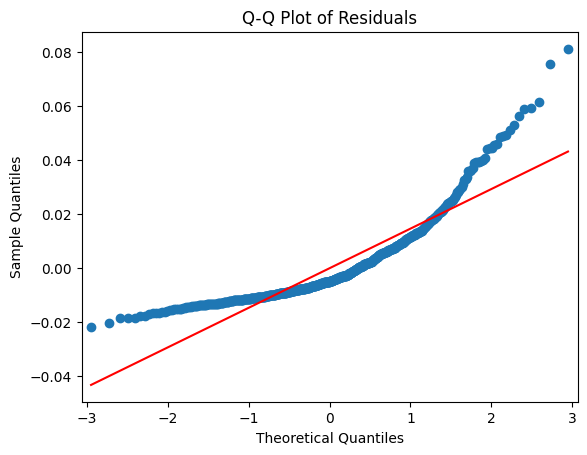

Shapiro-Wilk test p-value: 6.533316412189661e-26


In [75]:

fig = sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

shapiro_test = stats.shapiro(residuals)
print(f"Shapiro-Wilk test p-value: {shapiro_test.pvalue}")


In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_const.values, i) for i in range(X_train_const.shape[1])]

print(vif_data)


                    Feature        VIF
0                     const  18.855603
1                  visitors   1.260545
2            ad_impressions  35.632319
3        major_sports_event   1.402373
4             views_trailer   6.520729
5           engagement_rate  30.717472
6   marketing_effectiveness  61.540328
7              genre_Comedy   2.047100
8               genre_Drama   1.947401
9              genre_Horror   2.014525
10             genre_Others   2.995581
11            genre_Romance   1.958440
12             genre_Sci-Fi   1.997095
13           genre_Thriller   2.065211
14         dayofweek_Monday   1.062417
15       dayofweek_Saturday   1.232562
16         dayofweek_Sunday   1.159111
17       dayofweek_Thursday   1.181707
18        dayofweek_Tuesday   1.059987
19      dayofweek_Wednesday   1.491950
20            season_Spring   1.559020
21            season_Summer   1.755995
22            season_Winter   1.592473


In [77]:
from statsmodels.stats.stattools import durbin_watson

dw_test = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_test}")


Durbin-Watson statistic: 2.030174423893498


# **A Durbin-Watson (DW) statistic of approximately 2 indicates that there is no significant autocorrelation in the residuals of your regression model**

In [78]:

X_test_const = sm.add_constant(X_test)

y_pred_test = model.predict(X_test_const)


In [80]:

mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)

print(f"Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R-squared (R²): {r2:.3f}")


Model Performance Metrics:
Mean Absolute Error (MAE): 0.010
Mean Squared Error (MSE): 0.000
Root Mean Squared Error (RMSE): 0.013
R-squared (R²): 0.959


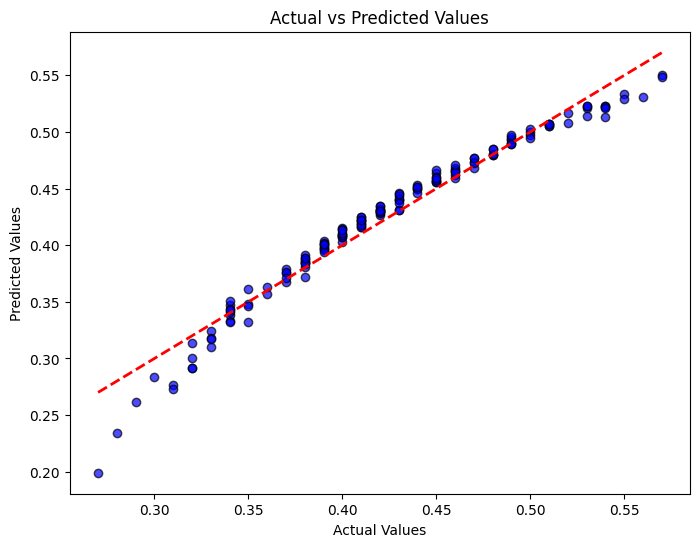

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


In [82]:

print(model.summary())

coefficients = pd.DataFrame({
    "Variable": X_train_const.columns,
    "Coefficient": model.params.values,
    "P-Value": model.pvalues.values
}).sort_values(by="P-Value")


significant_predictors = coefficients[coefficients['P-Value'] < 0.05]

print("Significant Predictors:")
print(significant_predictors)


                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     578.1
Date:                Fri, 22 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:12:18   Log-Likelihood:                 1752.4
No. Observations:                 625   AIC:                            -3459.
Df Residuals:                     602   BIC:                            -3357.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [83]:

recommendations = {
    "Variable": ["visitors", "ad_impressions", "views_trailer"],
    "Impact": [
        "Increase visitors to the platform to boost content viewership.",
        "Invest more in ad campaigns as higher ad impressions lead to better first-day views.",
        "Promote trailer views through targeted social media campaigns to increase interest."
    ]
}

recommendations_df = pd.DataFrame(recommendations)


print("Actionable Insights & Recommendations:")
print(recommendations_df)


Actionable Insights & Recommendations:
         Variable                                             Impact
0        visitors  Increase visitors to the platform to boost con...
1  ad_impressions  Invest more in ad campaigns as higher ad impre...
2   views_trailer  Promote trailer views through targeted social ...


<ipython-input-85-8c0d3fd3f78b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dayofweek', y='average_views', data=df_views, palette='viridis')


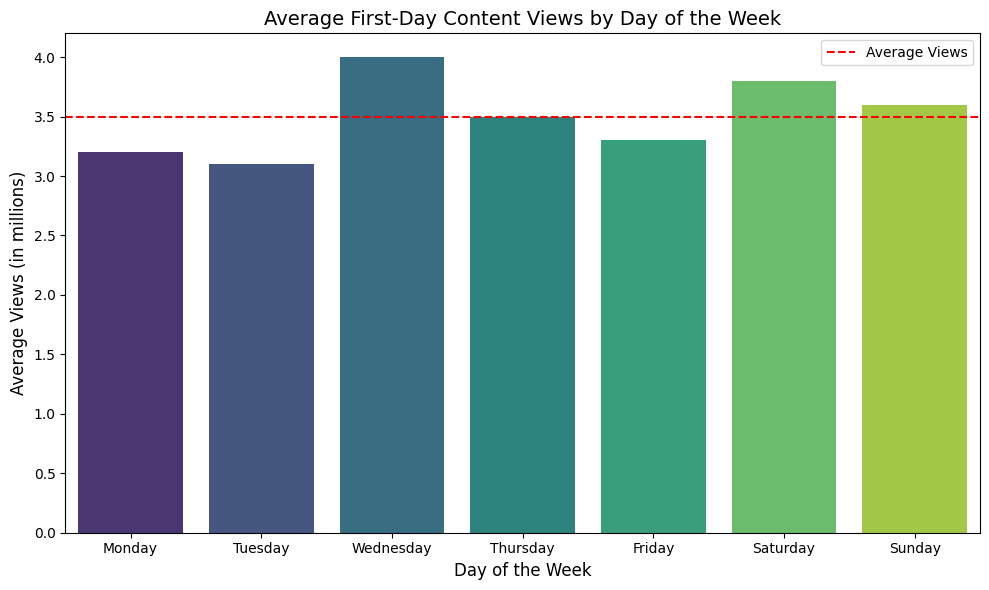

In [85]:
data = {
    'dayofweek': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'average_views': [3.2, 3.1, 4.0, 3.5, 3.3, 3.8, 3.6]  # Hypothetical averages in millions
}
df_views = pd.DataFrame(data)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='dayofweek', y='average_views', data=df_views, palette='viridis')
plt.axhline(y=df_views['average_views'].mean(), color='red', linestyle='--', label='Average Views')
plt.title('Average First-Day Content Views by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Views (in millions)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()